- 쇼생크 탈출 Word Cloud

In [116]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import time
import pandas as pd
from tqdm import tqdm

from urllib.parse import quote
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

import os

driver_name =  os.environ['HOMEDRIVE'] + os.environ['HOMEPATH'] + '\\downloads\\chromedriver.exe'


In [117]:

imdburl = 'https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ql_2'
driver = webdriver.Chrome(driver_name)
driver.get(imdburl)
time.sleep(2)

In [118]:
review_total = int(driver.find_element(By.CSS_SELECTOR, '.header > div > span').text.split()[0].replace(',',''))

In [119]:
if review_total > 1000:
    click_cnt = 4
else :
    click_cnt = (review_total // 25) - 1

for i in tqdm(range(click_cnt)):
    # print(f'{i} 번째')
    try:
        driver.find_element(By.CLASS_NAME, 'ipl-load-more__button').click()
        time.sleep(3)
    except:
        pass

100%|██████████| 4/4 [00:12<00:00,  3.09s/it]


In [120]:
# contents = driver.find_elements(By.CSS_SELECTOR, '.text.show-more__control')
# contents = driver.find_elements(By.CSS_SELECTOR, '.text.show-more__control')
# print(len(contents))

In [121]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [124]:
with open('data/test.txt', 'w') as f:
    f.write(driver.page_source)

In [ ]:
cons = soup.select('.text.show-more__control')
print(len(cons))

with open('data/Shawshank.txt', 'w') as f:
    for con in cons:
        f.write(con.get_text() + '\n')

driver.close()

50


In [ ]:
# HSB: Hue, Saturation(채도), Lightness(명도)
def grey_color(word, font_size, position, orientation, random_state, **kwargs):
    return f'hsl(0, 0%, {np.random.randint(60, 101)}%)'


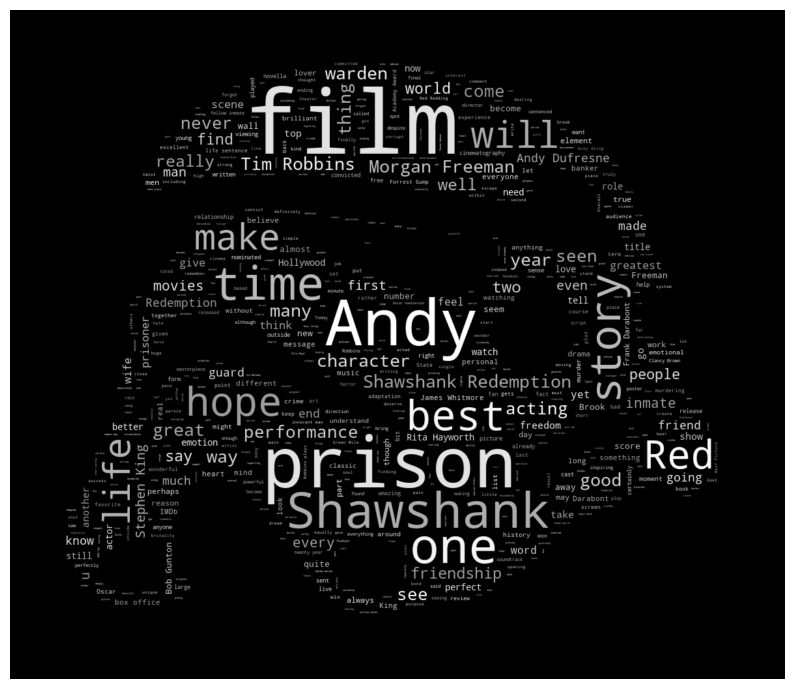

In [ ]:
with open('data/Shawshank.txt') as f:
    text = f.read()

sw = STOPWORDS
sw.add('movie')

wc = WordCloud(
        mask=mask, max_words=1000, stopwords=sw,
        margin=10, random_state=2023
    ).generate(text)

default_colors = wc.to_array

plt.figure(figsize=(10, 10))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2023),
           interpolation='bilinear')
plt.axis('off')
plt.show()